# Department of Computer Science & Engineering

## Session : Jan-May, 2023

### UE20CS344 – NETWORK ANALYSIS AND MINING

Assignment 1



#Team 11
# Book: Little Women

# Team Members

* PES1UG20CS192 - KANUMARI SRI CHARAN
* PES1UG20CS331 - RENITA KURIAN
* PES1UG20CS344 - RIYA JHA
* PES1UG20CS484 - VANSHIKA GOEL

# Implementation

a. Make a list of characters in the novel. You need to decide whom to include.<br>
Ans - The main characters in the novel "Little Women" by Louisa M. Alcott are:
1. Jo March
2. Beth March
3. Amy March
4. Meg March
5. Laurie Laurence
6. Mr. Laurence 
7. Marmee March/Mother
8. Mr. March/Father
9. Mr. Brooke
10. Frederick Bhaer
11. Hannah
12. Aunt March
13. Aunt Carrol
14. Florence
15. Fred Vaughn
16. Hummels

b. Extract a social graph of the manually identified characters in the text (as shown in the hands-on session). To do this, you need to use a co-occurrence algorithm as discussed and shown in the demo in class. Also, plot the graph using networkx

In [68]:
import nltk
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [69]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
# from google.colab import drive
# drive.mount('/content/drive')

In [71]:
book = open("/content/Team11_192_331_344_484.txt", "r", encoding="utf8")
book = book.read()
#print(book)

In [72]:
characters = ["Jo","Beth","Amy","Meg","Laurie","Mr_Laurence","Marmee","Father","Mr_Brooke","Professor_Bhaer","Hannah","Aunt_March","Aunt_Carrol","Florence","Hummels","Fred"]
len(characters)

16

In [73]:
book = book.replace("mother","Marmee")
book = book.replace("Mr. March","Father")
book = book.replace("Mr. Laurence","Mr_Laurence")
book = book.replace("Mr. Brooke","Mr_Brooke")
book = book.replace("John Brooke","Mr_Brooke")
book = book.replace("Professor Bhaer","Professor_Bhaer")
book = book.replace("Mr. Bhaer","Professor_Bhaer")
book = book.replace("Aunt March","Aunt_March")
book = book.replace("Aunt Carrol","Aunt_Carrol")

sentences = sent_tokenize(book)
print(len(sentences))

9286


In [74]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent:
        sentences.remove(sent)
        count += 1
    elif 'Alcott' in sent or 'Louisa May Alcott' in sent:
        sentences.remove(sent)
    elif "Little Women" in sent:
        sent.replace("Little Women","LittleWomen")
        
print(len(sentences))

9272


In [75]:
char_df = pd.DataFrame(0, index=characters, columns=characters)

for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Jo,Beth,Amy,Meg,Laurie,Mr_Laurence,Marmee,Father,Mr_Brooke,Professor_Bhaer,Hannah,Aunt_March,Aunt_Carrol,Florence,Hummels,Fred
Jo,0,286,256,372,318,26,194,24,24,36,56,32,4,0,4,20
Beth,286,0,148,126,46,18,88,6,2,0,48,6,4,0,4,2
Amy,256,148,0,148,168,4,68,6,2,0,26,28,4,2,0,4
Meg,372,126,148,0,86,8,140,6,56,0,42,12,0,0,4,4
Laurie,318,46,168,86,0,34,48,10,28,8,16,12,0,0,2,16


In [76]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [77]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 16
Nodes: ['Jo', 'Beth', 'Amy', 'Meg', 'Laurie', 'Mr_Laurence', 'Marmee', 'Father', 'Mr_Brooke', 'Professor_Bhaer', 'Hannah', 'Aunt_March', 'Aunt_Carrol', 'Florence', 'Hummels', 'Fred']

Number of edges in the graph: 75
Edges: [('Jo', 'Beth', {'weight': 286}), ('Jo', 'Amy', {'weight': 256}), ('Jo', 'Meg', {'weight': 372}), ('Jo', 'Laurie', {'weight': 318}), ('Jo', 'Mr_Laurence', {'weight': 26}), ('Jo', 'Marmee', {'weight': 194}), ('Jo', 'Father', {'weight': 24}), ('Jo', 'Mr_Brooke', {'weight': 24}), ('Jo', 'Professor_Bhaer', {'weight': 36}), ('Jo', 'Hannah', {'weight': 56}), ('Jo', 'Aunt_March', {'weight': 32}), ('Jo', 'Aunt_Carrol', {'weight': 4}), ('Jo', 'Hummels', {'weight': 4}), ('Jo', 'Fred', {'weight': 20}), ('Beth', 'Amy', {'weight': 148}), ('Beth', 'Meg', {'weight': 126}), ('Beth', 'Laurie', {'weight': 46}), ('Beth', 'Mr_Laurence', {'weight': 18}), ('Beth', 'Marmee', {'weight': 88}), ('Beth', 'Father', {'weight': 6}), ('Beth', 'Mr_Brooke', {'weight

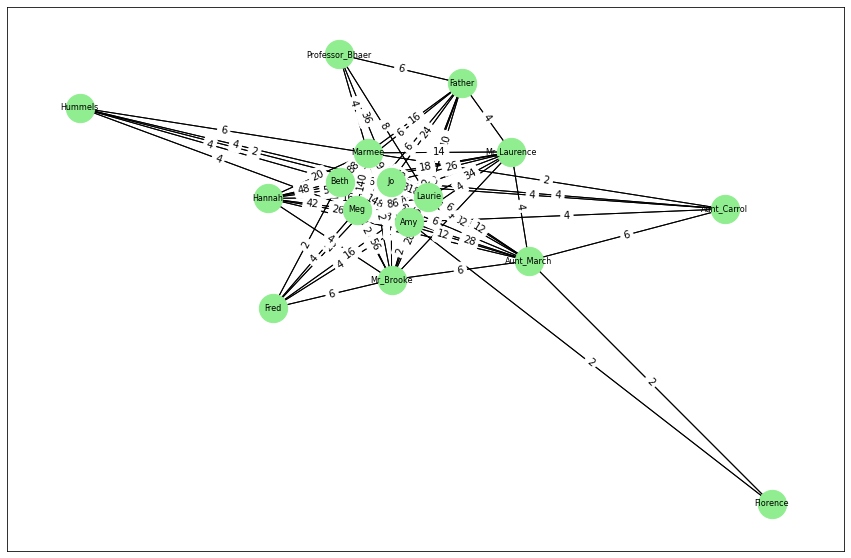

In [78]:
plt.figure(3, figsize=(15,10))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

c. Calculate the four types of centrality of main protagonists i.e. degree, betweenness, closeness, PageRank
Degree Centrality

1. Degree Centrality

[('Jo', 0.9333333333333333), ('Beth', 0.8666666666666667), ('Amy', 0.8666666666666667), ('Laurie', 0.8666666666666667), ('Marmee', 0.8666666666666667), ('Meg', 0.8), ('Mr_Brooke', 0.7333333333333333), ('Aunt_March', 0.7333333333333333), ('Mr_Laurence', 0.6666666666666666), ('Father', 0.6), ('Hannah', 0.6), ('Fred', 0.4), ('Aunt_Carrol', 0.3333333333333333), ('Hummels', 0.3333333333333333), ('Professor_Bhaer', 0.26666666666666666), ('Florence', 0.13333333333333333)]


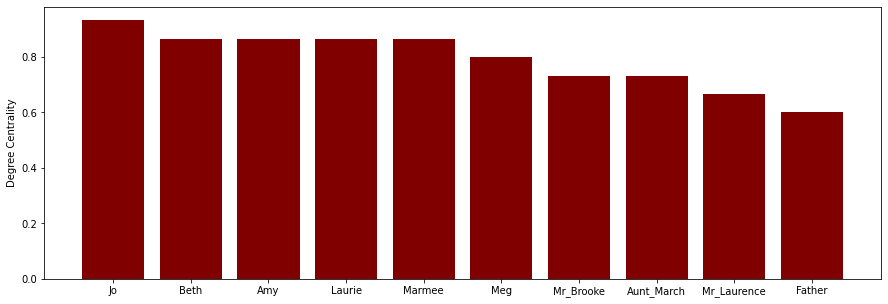

In [79]:
from operator import itemgetter
degc = nx.degree_centrality(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Degree Centrality')
plt.show() 

2. Betweenness Centrality

[('Amy', 0.09750566893424038), ('Jo', 0.07795918367346939), ('Aunt_March', 0.06122448979591837), ('Marmee', 0.05970521541950114), ('Laurie', 0.054943310657596375), ('Beth', 0.044285714285714296), ('Meg', 0.026031746031746034), ('Father', 0.01326530612244898), ('Mr_Brooke', 0.010317460317460315), ('Mr_Laurence', 0.002380952380952381), ('Professor_Bhaer', 0.0), ('Hannah', 0.0), ('Aunt_Carrol', 0.0), ('Florence', 0.0), ('Hummels', 0.0), ('Fred', 0.0)]


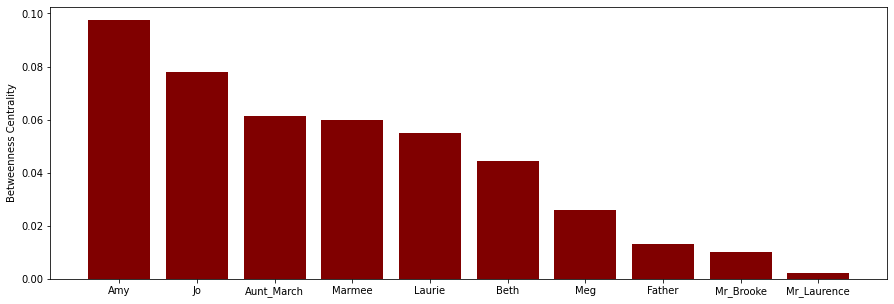

In [80]:
bet = nx.betweenness_centrality(G)
fin_list = sorted(bet.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Betweenness Centrality')
plt.show()

3. Closeness Centrality

[('Jo', 0.9375), ('Beth', 0.8823529411764706), ('Amy', 0.8823529411764706), ('Laurie', 0.8823529411764706), ('Marmee', 0.8823529411764706), ('Meg', 0.8333333333333334), ('Mr_Brooke', 0.7894736842105263), ('Aunt_March', 0.7894736842105263), ('Mr_Laurence', 0.75), ('Father', 0.7142857142857143), ('Hannah', 0.7142857142857143), ('Fred', 0.625), ('Aunt_Carrol', 0.6), ('Hummels', 0.5769230769230769), ('Professor_Bhaer', 0.5555555555555556), ('Florence', 0.5)]


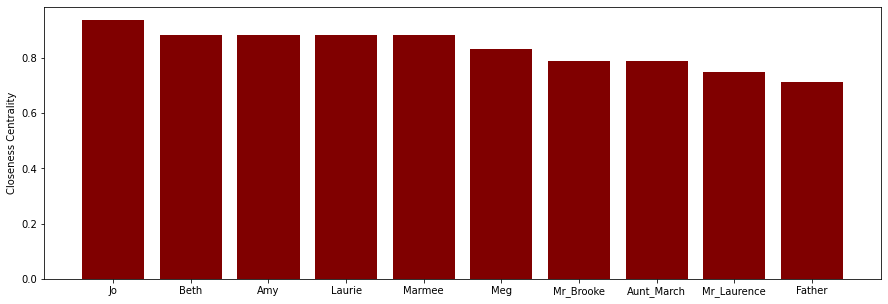

In [81]:
clos = nx.closeness_centrality(G)
fin_list = sorted(clos.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Closeness Centrality')
plt.show()

4. PageRank Centrality


 Sorted PageRank:

[('Jo', 0.9333333333333333), ('Beth', 0.8666666666666667), ('Amy', 0.8666666666666667), ('Laurie', 0.8666666666666667), ('Marmee', 0.8666666666666667), ('Meg', 0.8), ('Mr_Brooke', 0.7333333333333333), ('Aunt_March', 0.7333333333333333), ('Mr_Laurence', 0.6666666666666666), ('Father', 0.6), ('Hannah', 0.6), ('Fred', 0.4), ('Aunt_Carrol', 0.3333333333333333), ('Hummels', 0.3333333333333333), ('Professor_Bhaer', 0.26666666666666666), ('Florence', 0.13333333333333333)]


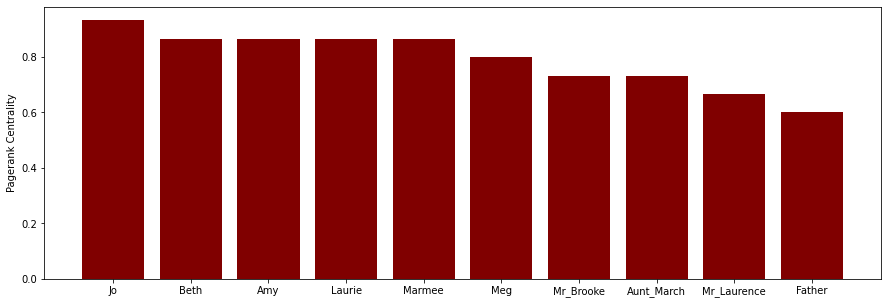

In [82]:
s='\n Sorted PageRank:\n'
print (s)
pgr=nx.pagerank(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Pagerank Centrality')
plt.show()

d. Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes.

In [83]:
#Local clustering coefficients
d = nx.clustering(G)
print({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)})

{'Professor_Bhaer': 1.0, 'Hannah': 1.0, 'Aunt_Carrol': 1.0, 'Florence': 1.0, 'Hummels': 1.0, 'Fred': 1.0, 'Mr_Laurence': 0.9555555555555556, 'Mr_Brooke': 0.8727272727272727, 'Father': 0.8611111111111112, 'Meg': 0.7878787878787878, 'Aunt_March': 0.7454545454545455, 'Beth': 0.717948717948718, 'Laurie': 0.7051282051282052, 'Marmee': 0.6923076923076923, 'Amy': 0.6794871794871795, 'Jo': 0.6483516483516484}


In [84]:
#Global clustering coefficients
print(nx.average_clustering(G))

0.8541219197469199


e. Detect communities using the following methods:
i. K - clique (percolation method)
ii. Louvain community detection
iii. Girvann Newman

i. K-Clique(percolation method)

In [85]:
#Clique is a subset of nodes in which each node is connected to all other nodes in the subset.
#Higher the value of k, the fewer the number of communities
#mmunity detection algorithm that finds all the maximal cliques of size k or more in a given graph

from networkx.algorithms.community import k_clique_communities
communities = list(k_clique_communities(G, 2)) #finds all the maximal cliques of size 3 or more in G and stores it in a list called communities
print("Communities found using k-clique method:")
for i, community in enumerate(communities): #enumerate is used to add an index to each community for easy reference
    print(f"Community {i + 1}: {community}")
    print(len(community))

Communities found using k-clique method:
Community 1: frozenset({'Professor_Bhaer', 'Aunt_Carrol', 'Beth', 'Amy', 'Hannah', 'Meg', 'Aunt_March', 'Marmee', 'Father', 'Mr_Brooke', 'Hummels', 'Mr_Laurence', 'Fred', 'Jo', 'Florence', 'Laurie'})
16


ii. Louvain Community Detection

In [86]:
import community.community_louvain as community_louvain
import pprint
#first compute the best partition
part = community_louvain.best_partition(G)
print(part)
communities = {}
for p in part.keys():
  key = part[p]
  if key in communities:
    communities[key].append(p)
  else:
    communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'Jo': 0, 'Beth': 0, 'Amy': 0, 'Meg': 0, 'Laurie': 0, 'Mr_Laurence': 1, 'Marmee': 0, 'Father': 2, 'Mr_Brooke': 1, 'Professor_Bhaer': 2, 'Hannah': 0, 'Aunt_March': 1, 'Aunt_Carrol': 1, 'Florence': 1, 'Hummels': 0, 'Fred': 1}
{0: ['Jo', 'Beth', 'Amy', 'Meg', 'Laurie', 'Marmee', 'Hannah', 'Hummels'],
 1: ['Mr_Laurence',
     'Mr_Brooke',
     'Aunt_March',
     'Aunt_Carrol',
     'Florence',
     'Fred'],
 2: ['Father', 'Professor_Bhaer']}


,0,1,2
0,Jo,Mr_Laurence,Father
1,Beth,Mr_Brooke,Professor_Bhaer
2,Amy,Aunt_March,None
3,Meg,Aunt_Carrol,None
4,Laurie,Florence,None
5,Marmee,Fred,None
6,Hannah,None,None
7,Hummels,None,None


iii. Girvann Newman

In [87]:
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Amy',
  'Aunt_Carrol',
  'Aunt_March',
  'Beth',
  'Father',
  'Fred',
  'Hannah',
  'Hummels',
  'Jo',
  'Laurie',
  'Marmee',
  'Meg',
  'Mr_Brooke',
  'Mr_Laurence'],
 ['Florence'],
 ['Professor_Bhaer']]

Find the degree distribution, average shortest path, and size of the largest
component. Also create equivalent generative models to compare against the social graph that you extracted (Ref: unit 3 - Generative models)
i. G(n,p) and G(n,m) generated graph
ii. Preferential attachment
 iii. Small-world model

Degree Distribution



In [88]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  16
Edges:  75
Average degree:  4.6875


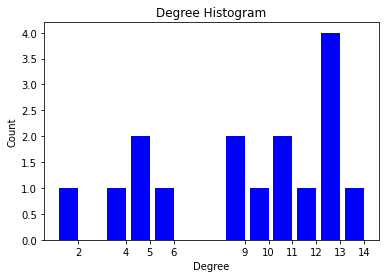

In [89]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)  # use layout for largest connected component
plt.axis('off')
plt.show()

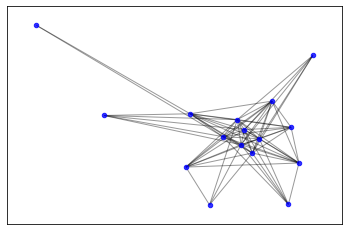

In [90]:
nx.draw_networkx_nodes(Gcc, pos, node_size=20, node_color='b', alpha=0.8)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

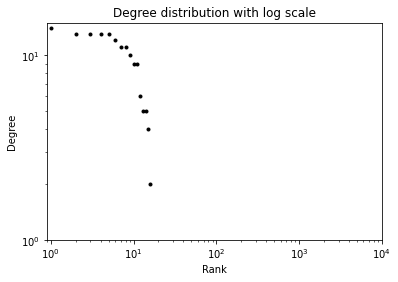

In [91]:
# Degree distribution 

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

Average Shortest Path

In [92]:
import itertools

components = nx.connected_components(G)
print(f"Number of connected components in G: {nx.number_connected_components(G)}")

if nx.number_connected_components(G) > 1:
    for component1, component2 in itertools.combinations(components, 2):
        G.add_edge(next(iter(component1)), next(iter(component2)))

components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Nodes in component {i+1}: {component}")
    print(f"Average shortest path length: {nx.average_shortest_path_length(G.subgraph(component))}")

Number of connected components in G: 1
Nodes in component 1: {'Professor_Bhaer', 'Marmee', 'Aunt_Carrol', 'Father', 'Beth', 'Mr_Brooke', 'Hummels', 'Florence', 'Mr_Laurence', 'Amy', 'Hannah', 'Fred', 'Jo', 'Meg', 'Laurie', 'Aunt_March'}
Average shortest path length: 1.3916666666666666


Size of largest component

In [93]:
largest = max(nx.connected_components(G), key=len)
len(largest)

16

i. G(n,p) and G(n,m) generated graph

Node  Jo  : Degree is  14
Node  Beth  : Degree is  13
Node  Amy  : Degree is  13
Node  Meg  : Degree is  12
Node  Laurie  : Degree is  13
Nodes in G:  16
Edges in G:  75


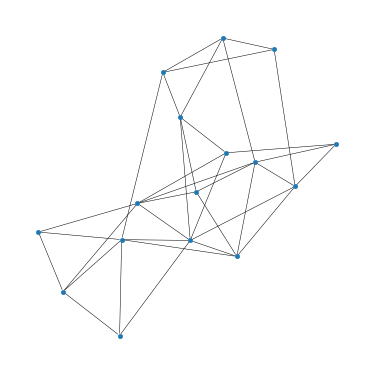

Nodes in G(n,p):  16
Edges in G(n,p):  36


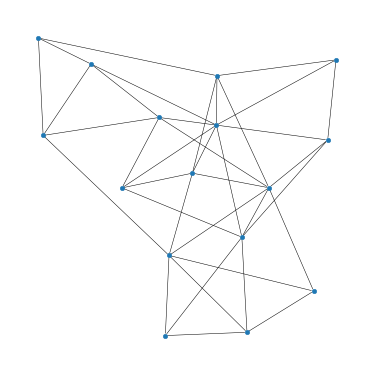

Nodes in G(n,m):  16
Edges in G(n,m):  75


In [94]:
degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
p=avg_degree/(no_nodes-1)

#Calculates the probability of edge creation p for generating a random graph with the same number of nodes and average degree as the given network
#G1 = nx.gnp_random_graph(no_nodes,p)
#fig = plt.figure(figsize =(10 ,5))
#nx.draw(G1, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
#plt.show()
N= G.order()
K = G.number_of_edges()
print ("Nodes in G: ", N)
print ("Edges in G: ", K)
#Make G(n,p) random graph 
G1 = nx.gnp_random_graph(no_nodes,p)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(5 ,5))
nx.draw(G1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

N1= G1.order()
K1 = G1.number_of_edges()
print ("Nodes in G(n,p): ", N1)
print ("Edges in G(n,p): ", K1)

#Make G(n,m) random graph 
G2 = nx.gnm_random_graph(no_nodes,K)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(5 ,5))
nx.draw(G1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

N2 = G2.order()
K2 = G2.number_of_edges()
print ("Nodes in G(n,m): ", N2)
print ("Edges in G(n,m): ", K2)

ii. Preferential attachment

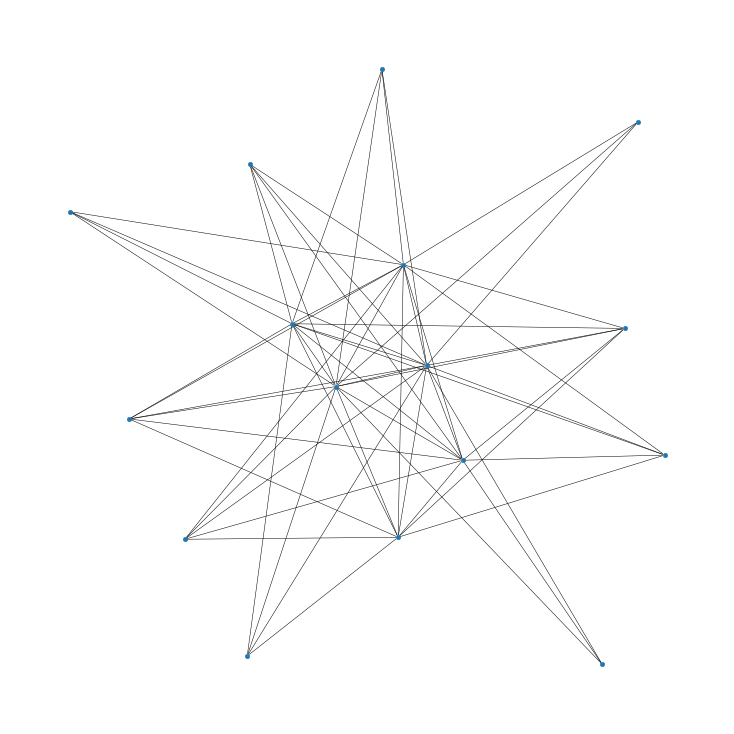

Nodes:  16
Edges:  60


In [95]:
neighbours = 10
H1 = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()
N = H1.order()
print("Nodes: ", N)
print("Edges: ", H1.number_of_edges())

iii. Small-world

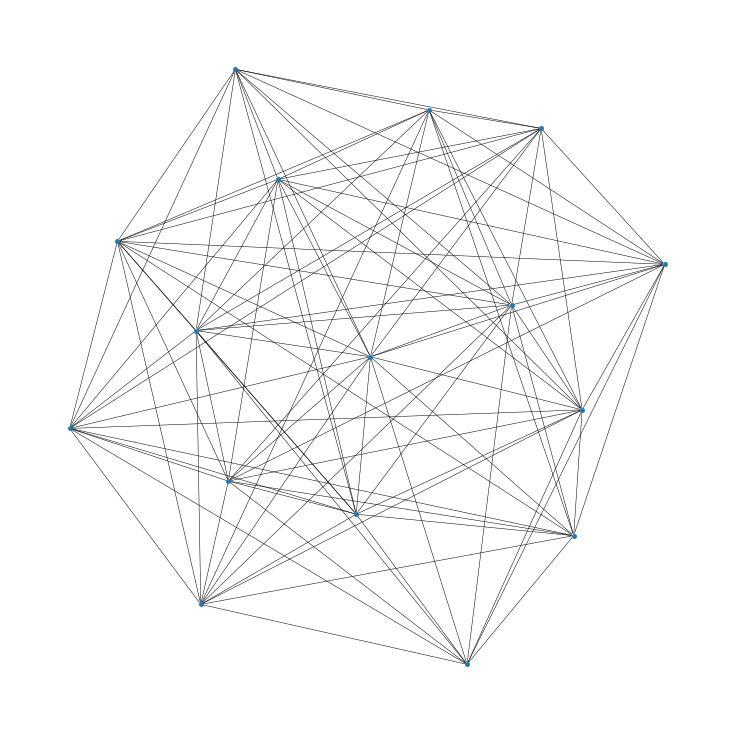

Nodes:  16
Edges:  96


In [96]:
#parameters : n (int) – The number of nodes, (int) – 
# paramters : Each node is joined with its k nearest neighbors in a ring topology
H2 = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()
N = H2.order()
print("Nodes: ", N)
print("Edges: ", H2.number_of_edges())

In [97]:
#transitivity comparison
print("G: Graph for Little Women book; G1: G(n,p); G2: G(n,m); H1: Preferential Attachment; H2: Small World Model")
print("Transitivity")
print("G: ",nx.transitivity(G))
print("G1: ",nx.transitivity(G1))
print("G2: ",nx.transitivity(G2))
print("H1: ",nx.transitivity(H1))
print("H2: ",nx.transitivity(H2))
print("------------")
print("Average Clustering Coefficient")
print("G: ",nx.average_clustering(G))
print("G1: ",nx.average_clustering(G1))
print("G2: ",nx.average_clustering(G2))
print("H1: ",nx.average_clustering(H1))
print("H2: ",nx.average_clustering(H2))
print("------------")
print("Diameter")
# print(nx.diameter(G))
print("G: ",nx.diameter(G))
print("G1: ",nx.diameter(G1))
print("G2: ",nx.diameter(G2))
print("H1: ",nx.diameter(H1))
print("H2: ",nx.diameter(H2))
print("------------")
print("Pearson Correlation Coefficient")
print("G: ",nx.degree_pearson_correlation_coefficient(G))
print("G1: ",nx.degree_pearson_correlation_coefficient(G1))
print("G2: ",nx.degree_pearson_correlation_coefficient(G2))
print("H1: ",nx.degree_pearson_correlation_coefficient(H1))
print("H2: ",nx.degree_pearson_correlation_coefficient(H2))
print("------------")

G: Graph for Little Women book; G1: G(n,p); G2: G(n,m); H1: Preferential Attachment; H2: Small World Model
Transitivity
G:  0.7723577235772358
G1:  0.30434782608695654
G2:  0.5990712074303406
H1:  0.5954198473282443
H2:  0.795688847235239
------------
Average Clustering Coefficient
G:  0.8541219197469199
G1:  0.35654761904761906
G2:  0.5955395299145299
H1:  0.8287261349761349
H2:  0.8006424131424131
------------
Diameter
G:  3
G1:  3
G2:  2
H1:  2
H2:  2
------------
Pearson Correlation Coefficient
G:  -0.3342000990589401
G1:  -0.10714285714285711
G2:  -0.04672330097087377
H1:  -0.6042988475980835
H2:  -0.15214312336936264
------------


## Ego Networks of all Protagonists

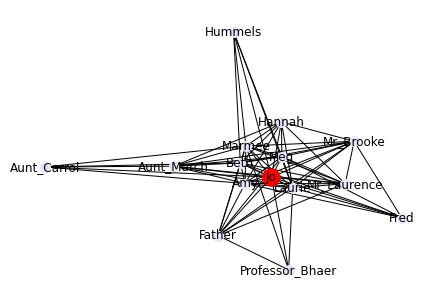

In [98]:
s='Jo'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='lavender',node_size=100,with_labels=True)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"ego_Jo.gml")

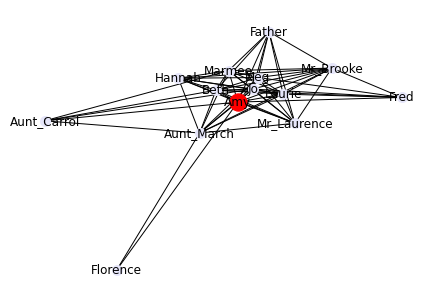

In [99]:
s='Amy'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s, radius=1)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='lavender',node_size=100,with_labels=True)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"ego_Amy.gml")

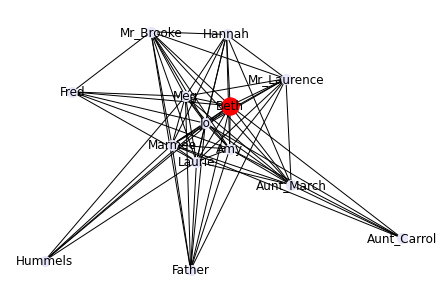

In [100]:
s='Beth'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s, radius=1)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='lavender',node_size=100,with_labels=True)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"ego_Beth.gml")

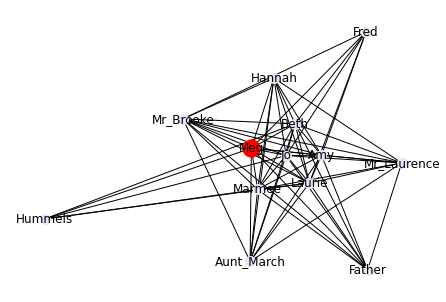

In [101]:
s='Meg'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s,radius=1)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='lavender',node_size=100,with_labels=True)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"ego_Meg.gml")

# Analysis

### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

Given the centrality measures, it would be safe to assume that the 4 March sisters, Jo, Meg, Beth and Amy are the main characters/protagonists of the book "Little Women". <br>

The 4 centralities are seen to have high correlation with the exception of betweeness centrality. 

### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

Viewing the variety of clustering coefficient values for all the characters:

- The nodes, Professor Bhaer, Hannah, Aunt Carrol, Florence, and Hummels have a clustering coefficient of 1, indicating that all of their neighbors are also connected. This suggests that these characters tend to form tightly-knit groups within the story, where everyone is connected to everyone else.
- Mr. Laurence and Mr. Brooke have high clustering coefficients, indicating that they are part of a close-knit group. Father, Meg, and Beth have moderate clustering coefficients, indicating that they are associated with character clusters but not as strongly as nodes with higher values.
- Laurie, Aunt March, Amy, Jo, and Marmee exhibit lower clustering coefficients, indicating that they are less linked to other characters and that they have more ties across groups.
- The book has several interconnected character clusters, according to the 0.85 global clustering coefficient.

The communities detected show that the characters' social relationships vary by age, family, and circumstance.

- In the k-clique method, all of the characters are put into a single community, which shows that they are all connected in some way.
- Three communities are identified by Louvain Detection: the March family and their close friends, the older generation and their social circle, and Father and Professor Bhaer. This implies that the characters' social circles are distinct.
- The Girvann technique identifies three communities, with the first including most of the story's important characters. The second community is Florence, a minor figure, and the third is Professor Bhaer, a newcomer to the March family's social circle.

The ego networks of the 4 protagonists show that:

- Jo's ego network shows significant links with her sisters Meg, Beth, Amy, and Laurie, who becomes close friend and love interest. She is close to her mother Marmee and Professor Bhaer, another love interest. This shows Jo's independence, creativity, and intellectual curiosity.
- Meg's ego network shows that her closest relationships are with her sisters, her husband John Brooke, and their children. She is also connected to other family members and friends, but her group of friends is smaller than Jo's. This reflects Meg's more traditional and domestic personality, as well as her desire for stability and security.
- In Beth's ego network, we can see that she has fewer connections than most people. Most of her connections are with her family, especially her sisters. This shows how shy and quiet Beth is, as well as how hard it is for her to deal with her illness and anxiety.
- Amy's ego network shows that she is connected to a wide range of people, including family members, friends, and people she knows from different social circles. She also knows important people like Aunt March, Aunt Carroll, and Fred Vaughn, who is wealthy. This reflects Amy's outgoing and ambitious personality, as well as her desire for social and financial success.

A close-knit social network is indicated by the average shortest path length of 1.39.

The clustering coefficient is related to whether or not a node is transitive because it measures how likely it is for nodes to form triangles. Transitivity in social networks means that people tend to connect with people who are connected to their friends or acquaintances.

- In "Little Women," the March sisters introduce their friends to each other and form close bonds with one another's acquaintances, giving an example of transitivity.

### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.




In a above cell, we have mentioned some measures comparing all the graphs such as <b>transitivity, average clustering coefficent, diameter of graph and Pearson's Correlation coefficent</b>. <br>

* The order for transitivity values goes as: H2>G>G2>H1>G1. This tells us that the Small world model has the highest transitivity followed by our actual social graph of the book. This can also we verified by the fact that the small world model has the highest number of edges among all the graphs.

* The Little Women book graph has the highest average clustering coefficient, suggesting that the Little Women book graph has the most clusters of tightly interconnected nodes.

* The G1 graph for G(n,p) has the highest diameter at 4, while G2 graph for G(n,m) and H1 graph for Preferential attachment have the lowest at 2. The Little Women graph has a diameter of 3.

* A Pearson correlation coefficient value close to 0 indicates no correlation, while a value close to 1 indicates a positive correlation, and a value close to -1 indicates a negative correlation. Here, the Little Women book graph has a negative correlation between node degrees, while the other graphs have either a positive or no correlation.

Overall, the Little Women book graph has higher values for transitivity and average clustering coefficient. This means that the nodes in the graph tend to form tight clusters. It also  has a small diameter, which shows that it has a lot of connections. The graph  has a negative correlation coefficient, which means that the distribution of degrees is skewed towards nodes with lower degrees. On the other hand, the transitivity and average clustering coefficients are lower in the generated graphs. This means that the nodes are less likely to form tight clusters. But their correlation coefficients are higher, which suggests that their degree distributions are more even.
The Little Women book graph is based on a real-world social network, while the generated graphs are based on mathematical models that don't always match the features of real-world social networks.